In [1]:
import pandas as pd
train_x_df = pd.read_csv('data/train_x_df.csv')
train_y_df = pd.read_csv('data/train_y_df.csv')
test_x_df = pd.read_csv('data/test_x_df.csv')
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [2]:
train_y_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.999389,0.999630,0.999261,0.999385,0.001187,9.632785,0.012565,0.000605,4.904978
1,0,1,9,0.999593,1.000000,0.999265,0.999266,0.004197,34.052364,0.020572,0.003014,24.453999
2,0,2,9,0.999266,0.999618,0.999262,0.999322,0.003942,31.981472,0.016630,0.002967,24.069899
3,0,3,9,0.999322,0.999388,0.998917,0.999387,0.003663,29.709074,0.019463,0.002362,19.158766
4,0,4,9,0.999015,0.999015,0.997631,0.998399,0.003266,26.466251,0.030180,0.001533,12.421005


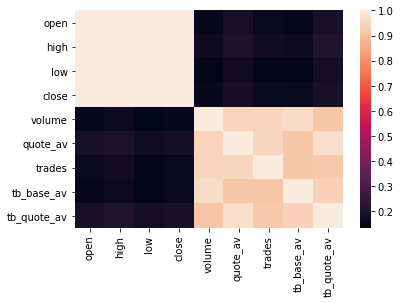

In [7]:
import seaborn as sns
sns.heatmap(test_x_df.iloc[:, 3:].corr());

In [9]:
import numpy as np
def df2d_to_array3d(df_2d):
    feature_size = len(df_2d.columns[3:]) # 9
    time_size = len(df_2d.time.unique()) # x는 1380, y는 120
    sample_size = len(df_2d.sample_id.unique()) # train은 7661, test는 535
    array_3d = df_2d.iloc[:,3:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

print(f'''
These shape stands for (sample_size, time_step, feature)
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


These shape stands for (sample_size, time_step, feature)
train_x_array (7661, 1380, 9)
train_y_array (7661, 120, 9)
test_x_array (535, 1380, 9)



In [15]:
X = train_x_array[:, :, 0]
y = train_y_array[:, :, 0]
X.shape, y.shape

((7661, 1380), (7661, 120))

In [25]:
y_argmax = []
for i in range(len(y)):
    y_argmax.append(y[i].argmax())
y_argmax = np.array(y_argmax)

In [27]:
y_argmax.shape

(7661,)

In [31]:
from sklearn.model_selection import train_test_split
train_test_split(X, y_argmax)

[array([[1.05439794, 1.05439794, 1.05407786, ..., 1.00103736, 0.99885255,
         1.        ],
        [0.97104853, 0.97056603, 0.97100574, ..., 0.99999362, 1.00054657,
         1.        ],
        [1.02403867, 1.02575552, 1.02521074, ..., 0.99903589, 1.00000536,
         1.        ],
        ...,
        [0.99507278, 0.99665654, 0.99765372, ..., 0.99788833, 0.99906152,
         1.        ],
        [1.04364514, 1.04349315, 1.0441395 , ..., 1.00091243, 1.00007606,
         1.        ],
        [1.02443433, 1.02387726, 1.02577901, ..., 1.00092196, 1.00051868,
         1.        ]]),
 array([[1.01848245, 1.01848245, 1.01848245, ..., 0.99416339, 0.99416339,
         1.        ],
        [0.99581057, 0.99644965, 0.99672842, ..., 0.99995792, 0.99999738,
         1.        ],
        [1.04332948, 1.03933859, 1.03705812, ..., 0.99800444, 0.9988597 ,
         1.        ],
        ...,
        [1.16033089, 1.1587218 , 1.15639329, ..., 1.00062478, 0.99895883,
         1.        ],
        [0.9

In [178]:
from collections import Counter
y = np.array(list(map(lambda x: 1 if x[-1] > x[0] else 0, train_y_array[:, :, 0])))
Counter(y)

Counter({0: 3809, 1: 3852})

In [179]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

/Users/duru/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

안 된다!

In [180]:
def get_avg_5(array):
    new_array = []
    for i in range(0, len(array), 5):
        new_array.append(array[i:i+5].mean())
    return np.array(new_array)

new_x = np.array(list(map(get_avg_5, X)))
new_x.shape

(7661, 276)

In [181]:
lr.fit(new_x, y)
lr.score(new_x, y)

0.5439237697428534

In [182]:
from sklearn.metrics import f1_score
f1_score(lr.predict(new_x), y)

0.5707616707616708

In [183]:
X_test = test_x_array[:, :, 0]
new_x_test = np.array(list(map(get_avg_5, X_test)))
lr.predict_proba(new_x_test)

array([[0.50375575, 0.49624425],
       [0.52267661, 0.47732339],
       [0.55487561, 0.44512439],
       ...,
       [0.59367836, 0.40632164],
       [0.47726796, 0.52273204],
       [0.47028561, 0.52971439]])

In [184]:
over_60 = list(map(lambda x: x[1] > 0.6, lr.predict_proba(new_x_test)))

In [185]:
sum(over_60)

15

In [186]:
submission = pd.DataFrame(np.zeros([len(over_60),2], np.int64),
                columns = ['buy_quantity', 'sell_time'])
submission['sample_id'] = range(len(submission))
submission = submission[['sample_id','buy_quantity','sell_time']]
submission.sample_id = submission.sample_id + test_x_df.sample_id.min()
submission

,sample_id,buy_quantity,sell_time
0,7661,0,0
1,7662,0,0
2,7663,0,0
3,7664,0,0
4,7665,0,0
...,...,...,...
530,8191,0,0
531,8192,0,0
532,8193,0,0
533,8194,0,0


In [187]:
for i in range(len(over_60)):
    if over_60[i]:
        submission.iloc[i, 1] = 1
        submission.iloc[i, 2] = 119
submission

,sample_id,buy_quantity,sell_time
0,7661,0,0
1,7662,0,0
2,7663,0,0
3,7664,1,119
4,7665,0,0
...,...,...,...
530,8191,0,0
531,8192,0,0
532,8193,0,0
533,8194,0,0


In [170]:
submission.to_csv("logistic_submission.csv", index = False)